# Standard Bank Tech Impact Project

## 1. Exploratory data analysis 

### Understanding the problem

According to the Uganda FinScope 2018 survey findings, 46% (8.5 million) adults borrowed money during the 12-month
period. The majority borrowing to cover regular living expenses (such as education) during low-income periods. 

Further, the largest source of borrowing is from informal lenders:

        1. Savings groups, 
        
        2. Burial societies,
        
        3. Community-based money lenders etc.
        
Xente is a Ugandan e-commerce startup that makes it easy for consumers to make payments, get loans,and shop using
simply a mobile phone.

The objective of this project is to create a machine learning model to predict which individuals are most 
likely to default on their loans, based on their loan repayment behaviour and ecommerce transaction activity.

### Type of the problem

Type of the Problem

It is a classification problem where we have to predict which individuals are most likely to default on their loans,
based on their loan repayment behaviour and ecommerce transaction activity.



### Hypothesis Generation

1. Few people paid back their loans within specified time.


2. Most of the money they had loaned was not used for business purposes.


3. The people who use their loans for non_business activities are unlikely to payback their loans.


4. The people who use their loans wisely are able to pay back their loans within specified time.


5. The banks are unable to improve individual loans because of failure to meet the rules.

In [1]:
# Loading important packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["axes.labelsize"] = 18
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
# importing the dataset

data = pd.read_csv('/home/valentineiscoming/Pictures/lateness/lateness assignment/Train.csv')

In [3]:
# viewing first five rows in the dataset

data.head()

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,2018-09-21 12:17:39,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,2018-09-25 09:20:29,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,2018-09-25 10:33:31,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,2018-09-27 10:26:41,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,2018-09-27 12:44:21,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Understanding the columns from variable definitions

variable_definitions = pd.read_csv('/home/valentineiscoming/Pictures/lateness/lateness assignment/VariableDefinitions.csv')

variable_definitions

,Variable,Definition
0,CustomerId,Unique number identifying the customer on plat...
1,TransactionStartTime,Transaction start time
2,Value,Value of transaction
3,Amount,Value of Transaction with charges
4,TransactionId,Unique transaction identifier on platform
5,BatchId,Identifier for bulk transactions being done on...
6,SubscriptionId,You can have one account with multiple subscri...
7,CurrencyCode,Country currency
8,CountryCode,Numerical geographical code of country
9,ProviderId,Source provider of Item bought


In [5]:
# view its shape

print(f'the shape is: {data.shape}')

the shape is: (2100, 27)


In [6]:
# viewing all columns

list(data.columns)

['CustomerId',
 'TransactionStartTime',
 'Value',
 'Amount',
 'TransactionId',
 'BatchId',
 'SubscriptionId',
 'CurrencyCode',
 'CountryCode',
 'ProviderId',
 'ProductId',
 'ProductCategory',
 'ChannelId',
 'TransactionStatus',
 'IssuedDateLoan',
 'AmountLoan',
 'Currency',
 'LoanId',
 'PaidOnDate',
 'IsFinalPayBack',
 'InvestorId',
 'DueDate',
 'LoanApplicationId',
 'PayBackId',
 'ThirdPartyId',
 'IsThirdPartyConfirmed',
 'IsDefaulted']

In [7]:
# more information about columns - datatypes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerId             2100 non-null   object 
 1   TransactionStartTime   2100 non-null   object 
 2   Value                  2100 non-null   float64
 3   Amount                 2100 non-null   float64
 4   TransactionId          2100 non-null   object 
 5   BatchId                2100 non-null   object 
 6   SubscriptionId         2100 non-null   object 
 7   CurrencyCode           2100 non-null   object 
 8   CountryCode            2100 non-null   int64  
 9   ProviderId             2100 non-null   object 
 10  ProductId              2100 non-null   object 
 11  ProductCategory        2100 non-null   object 
 12  ChannelId              2100 non-null   object 
 13  TransactionStatus      2100 non-null   int64  
 14  IssuedDateLoan         1488 non-null   object 
 15  Amou

In [8]:
# checking missing values

data.isna().sum()

CustomerId                 0
TransactionStartTime       0
Value                      0
Amount                     0
TransactionId              0
BatchId                    0
SubscriptionId             0
CurrencyCode               0
CountryCode                0
ProviderId                 0
ProductId                  0
ProductCategory            0
ChannelId                  0
TransactionStatus          0
IssuedDateLoan           612
AmountLoan               612
Currency                 612
LoanId                   612
PaidOnDate               612
IsFinalPayBack           612
InvestorId               612
DueDate                  614
LoanApplicationId        617
PayBackId                612
ThirdPartyId             614
IsThirdPartyConfirmed    612
IsDefaulted              612
dtype: int64

### Univariate analysis

### Dealing with Categorical features

In [9]:
# view the target

data['IsDefaulted'].value_counts()

0.0    1310
1.0     178
Name: IsDefaulted, dtype: int64

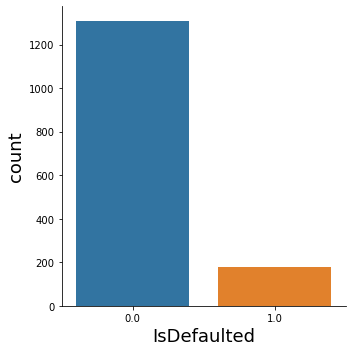

In [10]:
# Explore target distribution

sns.catplot('IsDefaulted', kind='count', data=data)

where :
    
    1.0 - means defaulted to agreed payback time
    
    0.0 - means not defaulted to agreed payback time
    
Few people payback their loans within specified time.
    

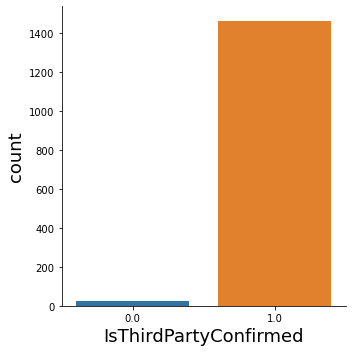

In [11]:
# Explore IsThirdPartyConfirmed distribution

sns.catplot('IsThirdPartyConfirmed', kind='count', data=data)

where :

1.0 - means loan order succeeded on platform

0.0 - means loan order not succeeded on platform

Greater number of loan order succeeded on platform.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'SubscriptionId_2'),
  Text(1, 0, 'SubscriptionId_4'),
  Text(2, 0, 'SubscriptionId_1'),
  Text(3, 0, 'SubscriptionId_7'),
  Text(4, 0, 'SubscriptionId_6'),
  Text(5, 0, 'SubscriptionId_5')])

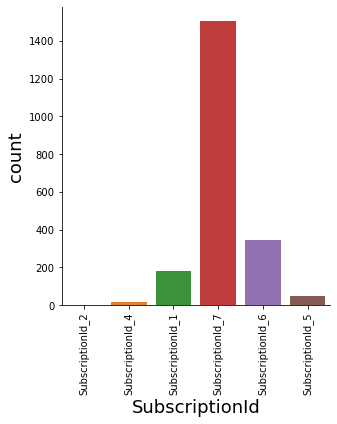

In [12]:
# Explore IsThirdPartyConfirmed distribution

sns.catplot('SubscriptionId', kind='count', data=data)

plt.xticks(rotation = 90)

SubscriptionId_7 recorded highest subscriptions compared t0 SubscriptionId_2


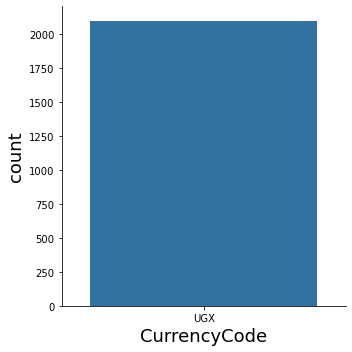

In [13]:
# Explore CurrencyCode Distribution

sns.catplot('CurrencyCode', kind='count', data=data)

The people surveyed recorded the use of Ugandan shilings(UGX) during the payment of their loans.

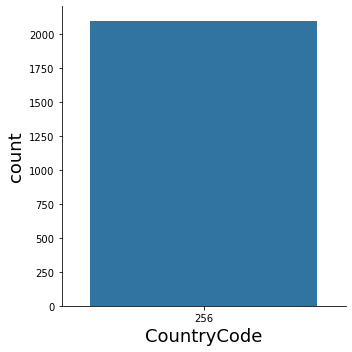

In [14]:
# Explore CountryCode distribution

sns.catplot('CountryCode', kind='count', data=data)

The people surveyed use the Ugandan Country code to access mobile services.

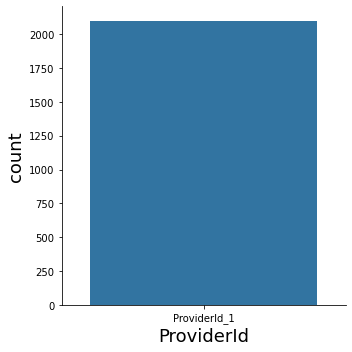

In [15]:
# Explore ProviderId distribution

sns.catplot('ProviderId', kind='count', data=data)

There is only one provider of the services.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'ProductId_7'),
  Text(1, 0, 'ProductId_3'),
  Text(2, 0, 'ProductId_4'),
  Text(3, 0, 'ProductId_8'),
  Text(4, 0, 'ProductId_6'),
  Text(5, 0, 'ProductId_13'),
  Text(6, 0, 'ProductId_15'),
  Text(7, 0, 'ProductId_17'),
  Text(8, 0, 'ProductId_1'),
  Text(9, 0, 'ProductId_9'),
  Text(10, 0, 'ProductId_2'),
  Text(11, 0, 'ProductId_19'),
  Text(12, 0, 'ProductId_5'),
  Text(13, 0, 'ProductId_16'),
  Text(14, 0, 'ProductId_18'),
  Text(15, 0, 'ProductId_10')])

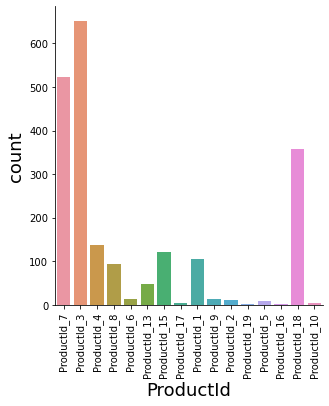

In [16]:
# Explore ProductId distribution

sns.catplot('ProductId', kind='count', data=data)

plt.xticks(rotation=90)

Product_3 was highly purchased compared to others.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'airtime'),
  Text(1, 0, 'data_bundles'),
  Text(2, 0, 'tv'),
  Text(3, 0, 'utility_bill'),
  Text(4, 0, 'movies'),
  Text(5, 0, 'retail'),
  Text(6, 0, 'financial_services')])

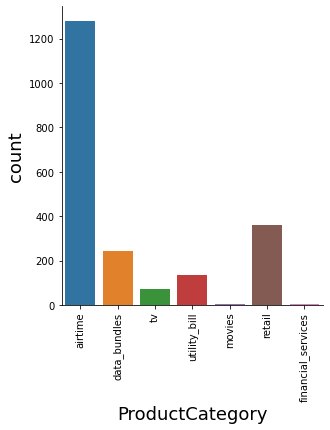

In [17]:
# Explore ProductCategory distribution

sns.catplot('ProductCategory', kind='count', data=data)

plt.xticks(rotation=90)

The surveyed people mostly accessed airtime services.

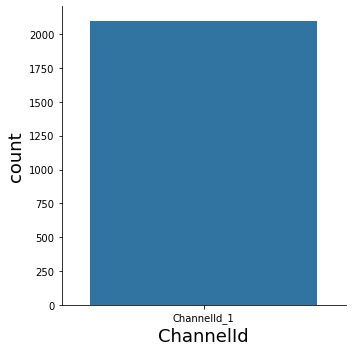

In [18]:
# Explore ChannelId distribution

sns.catplot('ChannelId', kind='count', data=data)

The people surved use the Xente Paylater on any other channel.

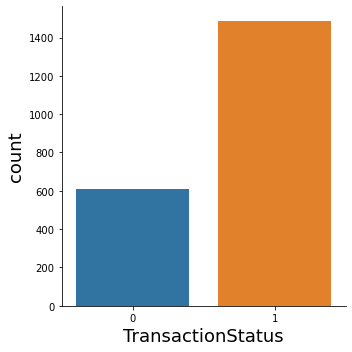

In [19]:
# Explore TransactionStatus distribution

sns.catplot('TransactionStatus', kind='count', data=data)

where

    1- Loan accepted status accepted
    
    0- Loan accepted status rejected

    Most people were granted loans.

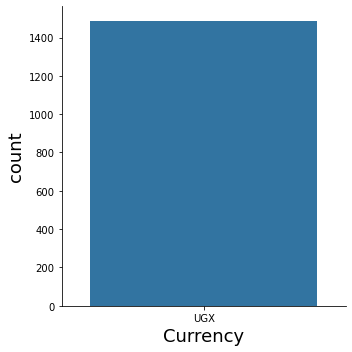

In [20]:
# Explore Currency distribution

sns.catplot('Currency', kind='count', data=data)

It shows Ugandan Shillings Denominations.

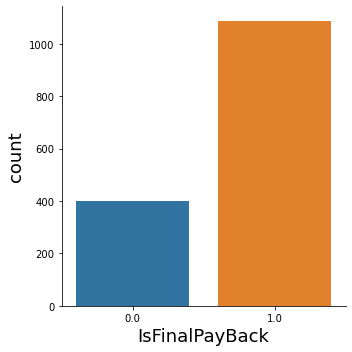

In [21]:
# Explore IsFinalPayBack distribution

sns.catplot('IsFinalPayBack', kind='count', data=data)

where:
    
    1-have done their last payback installment
    
    0-have not done their last payback installment
    
Most people had done the last payback installment.

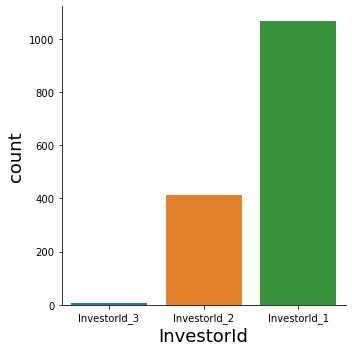

In [22]:
# Explore InvestorId distribution

sns.catplot('InvestorId', kind='count', data=data)

InvestorId_1 has issued loans to many customers.

### Dealing with Numerical Features

Text(0.5, 0, 'AmountLoan')

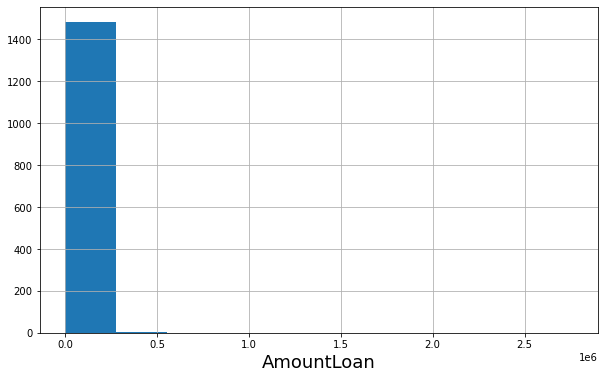

In [23]:
# Explore Amount distribution 

plt.figure(figsize=(10, 6))
data.AmountLoan.hist() 
plt.xlabel('AmountLoan')

Most people borrowed between 0 to 0.25e6 Ugandan Shilling

Text(0.5, 0, 'Value')

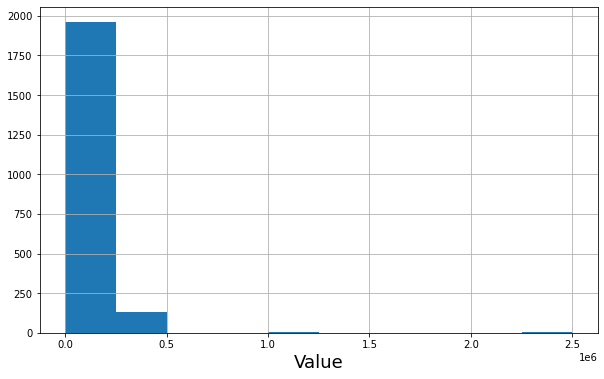

In [24]:
# Explore Value distribution 

plt.figure(figsize=(10, 6))
data.Value.hist() 
plt.xlabel('Value')

The value of transactions recorded most was between 0 to 0.25e6 Ugandan Shillings.

Text(0.5, 0, 'Amount')

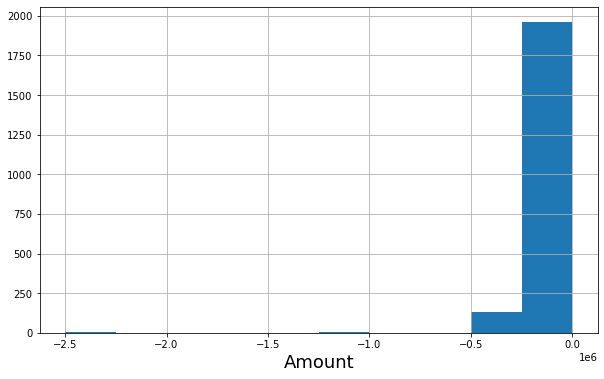

In [25]:
# Explore Amount distribution 

plt.figure(figsize=(10, 6))
data.Amount.hist() 
plt.xlabel('Amount')

The value of Transactions with Charges recorded most was between -0.25e6 to 0 Ugandan Shillings.

### Bivariate Analysis

(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

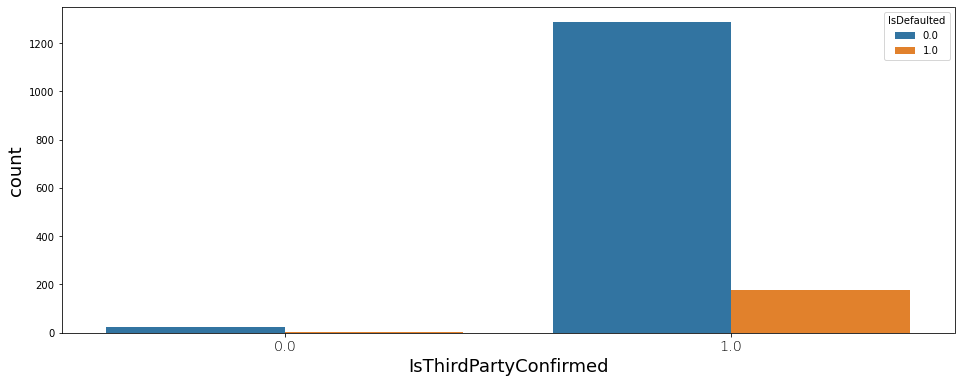

In [26]:
# IsThirdPartyConfirmed  vs IsDefaulted

plt.figure(figsize=(16, 6))
sns.countplot('IsThirdPartyConfirmed', hue= 'IsDefaulted', data=data)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)


where:
    
    0-Loan order succeeded on platform.
    
    1-Loan order not succeeded on platform.
    
    There were few people who defaulted to the agreed payback time after their loan order succeeded on platform.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'SubscriptionId_2'),
  Text(1, 0, 'SubscriptionId_4'),
  Text(2, 0, 'SubscriptionId_1'),
  Text(3, 0, 'SubscriptionId_7'),
  Text(4, 0, 'SubscriptionId_6'),
  Text(5, 0, 'SubscriptionId_5')])

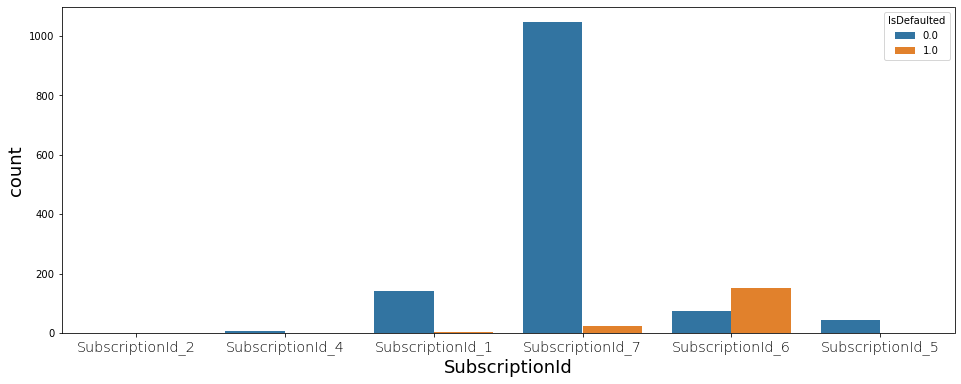

In [27]:
#   SubscriptionId vs IsDefaulted

plt.figure(figsize=(16, 6))
sns.countplot('SubscriptionId', hue= 'IsDefaulted', data=data)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)


SubscriptionId_6 recorded many people who defaulted to the agreed payback time.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'ProductId_7'),
  Text(1, 0, 'ProductId_3'),
  Text(2, 0, 'ProductId_4'),
  Text(3, 0, 'ProductId_8'),
  Text(4, 0, 'ProductId_6'),
  Text(5, 0, 'ProductId_13'),
  Text(6, 0, 'ProductId_15'),
  Text(7, 0, 'ProductId_17'),
  Text(8, 0, 'ProductId_1'),
  Text(9, 0, 'ProductId_9'),
  Text(10, 0, 'ProductId_2'),
  Text(11, 0, 'ProductId_19'),
  Text(12, 0, 'ProductId_5'),
  Text(13, 0, 'ProductId_16'),
  Text(14, 0, 'ProductId_18'),
  Text(15, 0, 'ProductId_10')])

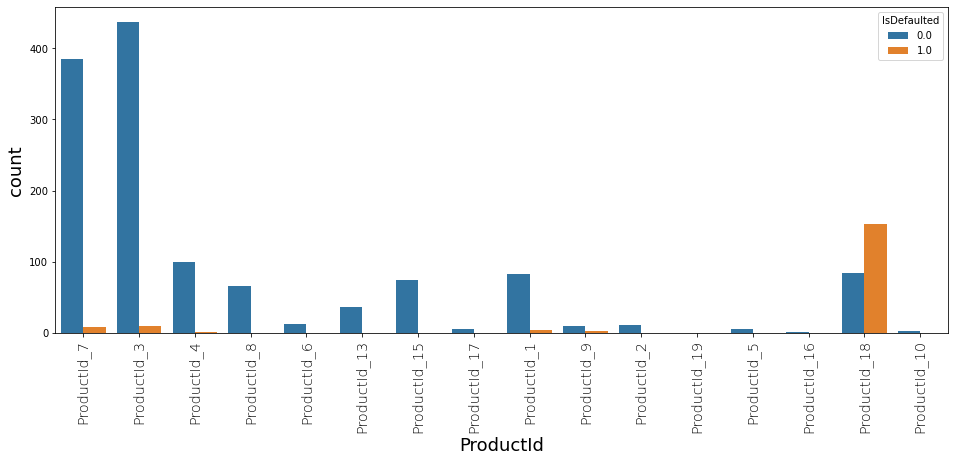

In [28]:
#   ProductId vs IsDefaulted

plt.figure(figsize=(16, 6))
sns.countplot('ProductId', hue= 'IsDefaulted', data=data)
plt.xticks(
    rotation=90,
    fontweight='light',
    fontsize='x-large'  
)

The people who bought productId_18 defaulted to the agreed payback time.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'airtime'),
  Text(1, 0, 'data_bundles'),
  Text(2, 0, 'tv'),
  Text(3, 0, 'utility_bill'),
  Text(4, 0, 'movies'),
  Text(5, 0, 'retail'),
  Text(6, 0, 'financial_services')])

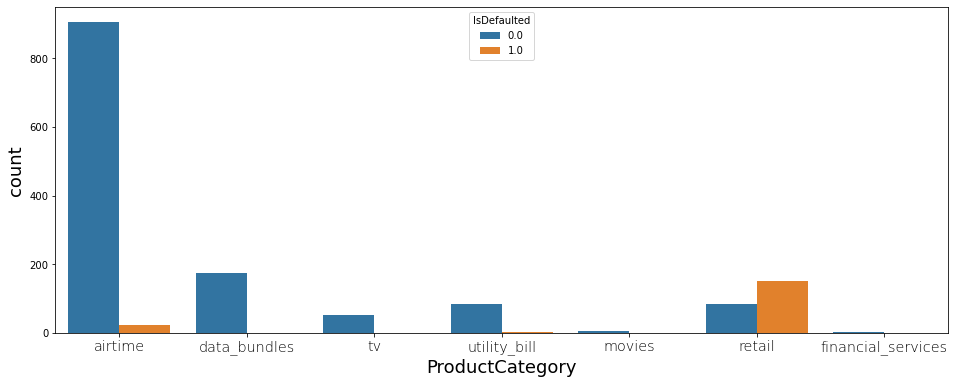

In [29]:
# ProductCategory vs IsDefaulted

plt.figure(figsize=(16, 6))
sns.countplot('ProductCategory', hue= 'IsDefaulted', data=data)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)

The people who purchased retail type of product defaulted to the agreed payback time.

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

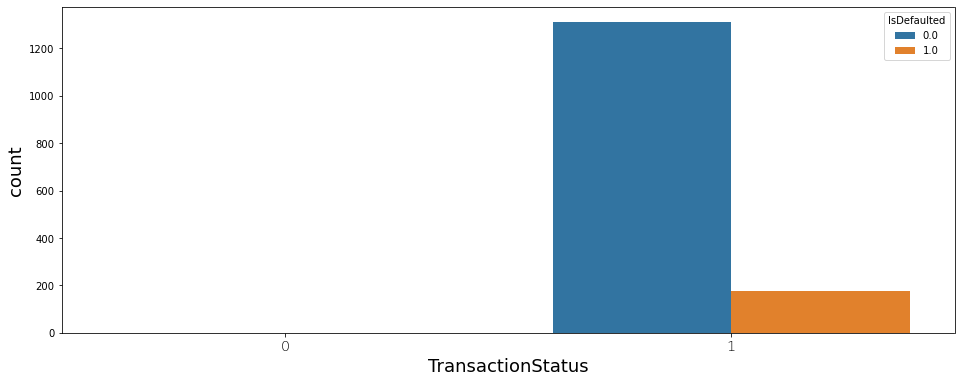

In [30]:
#   TransactionStatus vs IsDefaulted

plt.figure(figsize=(16, 6))
sns.countplot('TransactionStatus', hue= 'IsDefaulted', data=data)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)

Few people who received load defaulted to the agreed payback time.

(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

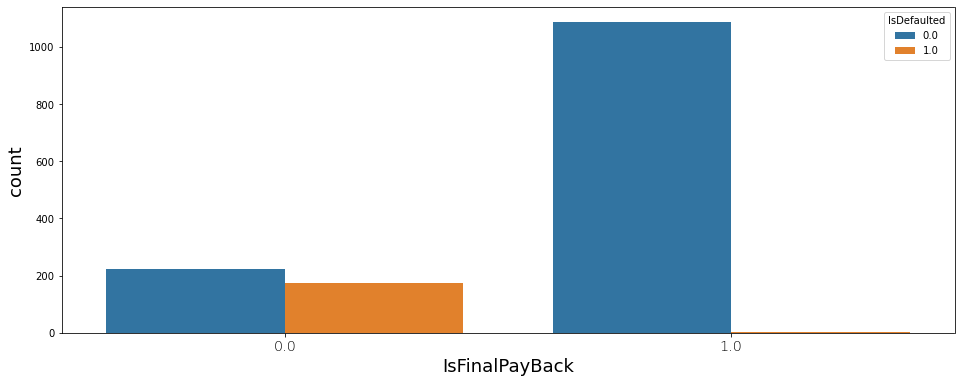

In [31]:
#   IsFinalPayBack vs IsDefaulted

plt.figure(figsize=(16, 6))
sns.countplot('IsFinalPayBack', hue= 'IsDefaulted', data=data)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)

where:

0-Not last payment installment.

1-Last payment installment.

Very few had their final payment installments.

(array([0, 1, 2]),
 [Text(0, 0, 'InvestorId_3'),
  Text(1, 0, 'InvestorId_2'),
  Text(2, 0, 'InvestorId_1')])

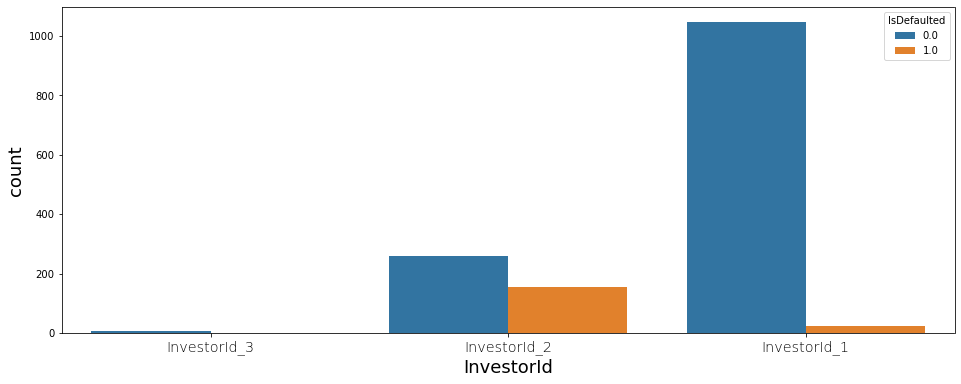

In [32]:
#   InvestorId vs IsDefaulted

plt.figure(figsize=(16, 6))
sns.countplot('InvestorId', hue= 'IsDefaulted', data=data)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)

InvestorId_2 recorded highest number of people who defaulted to agreed payback time.

## Results

1. Few people paid back their loans within specified time - True


2. Most of the money they had loaned was not used for business purposes - True


3. The people who use their loans for non_business activities are unlikely to payback their loans - True


4. The people who use their loans wisely are able to pay back their loans within specified time - True


5. The banks are unable to improve individual loans because of failure to meet the rules-True 

## Feature Engineering 

### Handling missing values

In [33]:
from sklearn.impute import SimpleImputer

# max fill function for categorical columns 

data['IssuedDateLoan'].fillna(data['IssuedDateLoan'].value_counts().idxmax(),inplace=True)
data['Currency'].fillna(data['Currency'].value_counts().idxmax(),inplace=True)
data['LoanId'].fillna(data['LoanId'].value_counts().idxmax(),inplace=True)
data['PaidOnDate'].fillna(data['PaidOnDate'].value_counts().idxmax(),inplace=True)
data['InvestorId'].fillna(data['InvestorId'].value_counts().idxmax(),inplace=True)
data['DueDate'].fillna(data['DueDate'].value_counts().idxmax(),inplace=True)
data['LoanApplicationId'].fillna(data['LoanApplicationId'].value_counts().idxmax(),inplace=True)
data['PayBackId'].fillna(data['PayBackId'].value_counts().idxmax(),inplace=True)
data['ThirdPartyId'].fillna(data['ThirdPartyId'].value_counts().idxmax(),inplace=True)
data['IsThirdPartyConfirmed'].fillna(data['IsThirdPartyConfirmed'].value_counts().idxmax(),inplace=True)
data['IsDefaulted'].fillna(data['IsDefaulted'].value_counts().idxmax(),inplace=True)
data['IsFinalPayBack'].fillna(data['IsFinalPayBack'].value_counts().idxmax(),inplace=True)

# filling missing values with mean of the column(numerical features)

data=data.fillna(data['AmountLoan'].mean())



In [34]:
# checking if missing values have remained

data.isna().sum().sum()

0

In [35]:
data.head()

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,2018-09-21 12:17:39,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,...,LoanId_417,2019-05-31 13:28:24,1.0,InvestorId_1,2019-03-17 11:59:06,LoanApplicationId_354,PayBackId_1625,ThirdPartyId_1092,1.0,0.0
1,CustomerId_27,2018-09-25 09:20:29,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,...,LoanId_417,2019-05-31 13:28:24,1.0,InvestorId_1,2019-03-17 11:59:06,LoanApplicationId_354,PayBackId_1625,ThirdPartyId_1092,1.0,0.0
2,CustomerId_27,2018-09-25 10:33:31,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,...,LoanId_417,2019-05-31 13:28:24,1.0,InvestorId_1,2019-03-17 11:59:06,LoanApplicationId_354,PayBackId_1625,ThirdPartyId_1092,1.0,0.0
3,CustomerId_27,2018-09-27 10:26:41,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,...,LoanId_417,2019-05-31 13:28:24,1.0,InvestorId_1,2019-03-17 11:59:06,LoanApplicationId_354,PayBackId_1625,ThirdPartyId_1092,1.0,0.0
4,CustomerId_27,2018-09-27 12:44:21,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,...,LoanId_417,2019-05-31 13:28:24,1.0,InvestorId_1,2019-03-17 11:59:06,LoanApplicationId_354,PayBackId_1625,ThirdPartyId_1092,1.0,0.0


In [36]:
# dropping features

data = data.drop('ChannelId', axis=1)
data = data.drop('Currency', axis=1)
data = data.drop('CurrencyCode', axis=1)
data = data.drop('CountryCode', axis=1)
data = data.drop('ProviderId', axis=1)
data = data.drop('CustomerId', axis=1)
data = data.drop('TransactionId',axis=1)
data = data.drop('TransactionStartTime',axis=1)
data = data.drop('BatchId',axis=1)
data = data.drop('IssuedDateLoan', axis=1)
data = data.drop('LoanId', axis=1)
data = data.drop('PaidOnDate', axis=1)
data = data.drop('DueDate', axis=1)
data = data.drop('PayBackId', axis=1)
data = data.drop('LoanApplicationId', axis=1)
data = data.drop('ThirdPartyId', axis=1)

In [37]:
data.shape

(2100, 11)

In [38]:
# convert categorical features to numerical features


categorical_features = ['SubscriptionId','ProductId',
                        'ProductCategory','InvestorId']

# One Hot Encoding conversion
data = pd.get_dummies(data, prefix_sep='_', columns = categorical_features)


#show the shape of the data
data.shape

(2100, 39)

In [39]:
list(data.columns)

['Value',
 'Amount',
 'TransactionStatus',
 'AmountLoan',
 'IsFinalPayBack',
 'IsThirdPartyConfirmed',
 'IsDefaulted',
 'SubscriptionId_SubscriptionId_1',
 'SubscriptionId_SubscriptionId_2',
 'SubscriptionId_SubscriptionId_4',
 'SubscriptionId_SubscriptionId_5',
 'SubscriptionId_SubscriptionId_6',
 'SubscriptionId_SubscriptionId_7',
 'ProductId_ProductId_1',
 'ProductId_ProductId_10',
 'ProductId_ProductId_13',
 'ProductId_ProductId_15',
 'ProductId_ProductId_16',
 'ProductId_ProductId_17',
 'ProductId_ProductId_18',
 'ProductId_ProductId_19',
 'ProductId_ProductId_2',
 'ProductId_ProductId_3',
 'ProductId_ProductId_4',
 'ProductId_ProductId_5',
 'ProductId_ProductId_6',
 'ProductId_ProductId_7',
 'ProductId_ProductId_8',
 'ProductId_ProductId_9',
 'ProductCategory_airtime',
 'ProductCategory_data_bundles',
 'ProductCategory_financial_services',
 'ProductCategory_movies',
 'ProductCategory_retail',
 'ProductCategory_tv',
 'ProductCategory_utility_bill',
 'InvestorId_InvestorId_1',
 'In

In [40]:
data

,Value,Amount,TransactionStatus,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,IsDefaulted,SubscriptionId_SubscriptionId_1,SubscriptionId_SubscriptionId_2,SubscriptionId_SubscriptionId_4,...,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_retail,ProductCategory_tv,ProductCategory_utility_bill,InvestorId_InvestorId_1,InvestorId_InvestorId_2,InvestorId_InvestorId_3
0,550.0,-550.0,0,11827.247312,1.0,1.0,0.0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,550.0,-550.0,0,11827.247312,1.0,1.0,0.0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,550.0,-550.0,0,11827.247312,1.0,1.0,0.0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
3,1000.0,-1000.0,0,11827.247312,1.0,1.0,0.0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,500.0,-500.0,0,11827.247312,1.0,1.0,0.0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,2000.0,-2000.0,1,2370.000000,1.0,1.0,0.0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2096,5000.0,-5000.0,1,5925.000000,1.0,1.0,0.0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2097,5000.0,-5000.0,1,7100.000000,1.0,1.0,0.0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2098,1500.0,-1500.0,1,1733.000000,1.0,1.0,0.0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [41]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# feature scalling by using minmaxscaler method 
scaler = MinMaxScaler(feature_range=(0, 1))


data['Value'] = scaler.fit_transform(data['Value'].values.reshape(-1,1))
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['AmountLoan'] = scaler.fit_transform(data['AmountLoan'].values.reshape(-1,1))

#show shape 
data.shape  

(2100, 39)

In [42]:
#Checking first five rows

data.head()

,Value,Amount,TransactionStatus,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,IsDefaulted,SubscriptionId_SubscriptionId_1,SubscriptionId_SubscriptionId_2,SubscriptionId_SubscriptionId_4,...,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_retail,ProductCategory_tv,ProductCategory_utility_bill,InvestorId_InvestorId_1,InvestorId_InvestorId_2,InvestorId_InvestorId_3
0,0.00018,0.99982,0,0.004267,1.0,1.0,0.0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,0.00018,0.99982,0,0.004267,1.0,1.0,0.0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,0.00018,0.99982,0,0.004267,1.0,1.0,0.0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
3,0.00036,0.99964,0,0.004267,1.0,1.0,0.0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.00016,0.99984,0,0.004267,1.0,1.0,0.0,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [43]:
# Checking the first row

data[:1].values

array([[1.80007200e-04, 9.99819993e-01, 0.00000000e+00, 4.26719590e-03,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

# Feature Selection

### Univariate Analysis

In [44]:
# import packages 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [45]:
#split dataset into features and target
target = data['IsDefaulted']
features = data.drop('IsDefaulted', axis =1)

target
features

,Value,Amount,TransactionStatus,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,SubscriptionId_SubscriptionId_1,SubscriptionId_SubscriptionId_2,SubscriptionId_SubscriptionId_4,SubscriptionId_SubscriptionId_5,...,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_retail,ProductCategory_tv,ProductCategory_utility_bill,InvestorId_InvestorId_1,InvestorId_InvestorId_2,InvestorId_InvestorId_3
0,0.00018,0.99982,0,0.004267,1.0,1.0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0.00018,0.99982,0,0.004267,1.0,1.0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0.00018,0.99982,0,0.004267,1.0,1.0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
3,0.00036,0.99964,0,0.004267,1.0,1.0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0.00016,0.99984,0,0.004267,1.0,1.0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.00076,0.99924,1,0.000841,1.0,1.0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2096,0.00196,0.99804,1,0.002129,1.0,1.0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2097,0.00196,0.99804,1,0.002554,1.0,1.0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2098,0.00056,0.99944,1,0.000610,1.0,1.0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [46]:
#apply SelectKBest class to extract top 20 best features
bestfeatures = SelectKBest(score_func=chi2, k=20)

#train to find best features
fit = bestfeatures.fit(features,target)

#save in the dataframe 
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

#naming the dataframe columns
featureScores.columns = ['Specs','Score'] 

#print 20 best features 
print(featureScores.nlargest(20,'Score'))  

                              Specs       Score
10  SubscriptionId_SubscriptionId_6  572.251128
18           ProductId_ProductId_18  541.694439
32           ProductCategory_retail  541.694439
36          InvestorId_InvestorId_2  447.677555
4                    IsFinalPayBack  151.045310
35          InvestorId_InvestorId_1  109.386714
11  SubscriptionId_SubscriptionId_7   93.741210
28          ProductCategory_airtime   75.431238
21            ProductId_ProductId_3   40.507747
0                             Value   33.139332
25            ProductId_ProductId_7   32.531620
2                 TransactionStatus   23.311302
29     ProductCategory_data_bundles   20.464900
6   SubscriptionId_SubscriptionId_1   12.859280
15           ProductId_ProductId_15   11.206035
22            ProductId_ProductId_4   10.688622
26            ProductId_ProductId_8    8.705515
34     ProductCategory_utility_bill    8.603894
33               ProductCategory_tv    6.668054
9   SubscriptionId_SubscriptionId_5    4

In [47]:
# fit and tranform into the 20 best features 
transformer = SelectKBest(chi2, k=20)

#transform from 41 features into top 20 features
top_20_features = transformer.fit_transform(features, target)

#show the shape 
top_20_features.shape 

(2100, 20)

### Feature Importance

In [48]:
#import package 
from sklearn.ensemble import ExtraTreesClassifier

[4.37003253e-02 4.17558970e-02 4.21296896e-02 1.96263084e-01
 1.63581376e-01 6.71593752e-03 6.76708365e-03 4.06136556e-08
 2.79719970e-04 8.34334919e-03 1.00372866e-01 1.40503309e-02
 2.83509887e-03 9.15886967e-05 7.31273219e-04 1.84842864e-03
 4.53268464e-06 1.15378303e-06 7.46308938e-02 2.08847257e-07
 6.24714371e-07 5.63570363e-03 1.19053973e-03 3.41839663e-06
 2.31517378e-04 1.09295546e-02 9.22641626e-05 3.22657048e-03
 1.29808293e-02 1.29076886e-03 0.00000000e+00 4.87108544e-08
 9.91543640e-02 8.17804193e-04 2.71992613e-03 7.74052207e-02
 7.99938684e-02 2.24097277e-04]


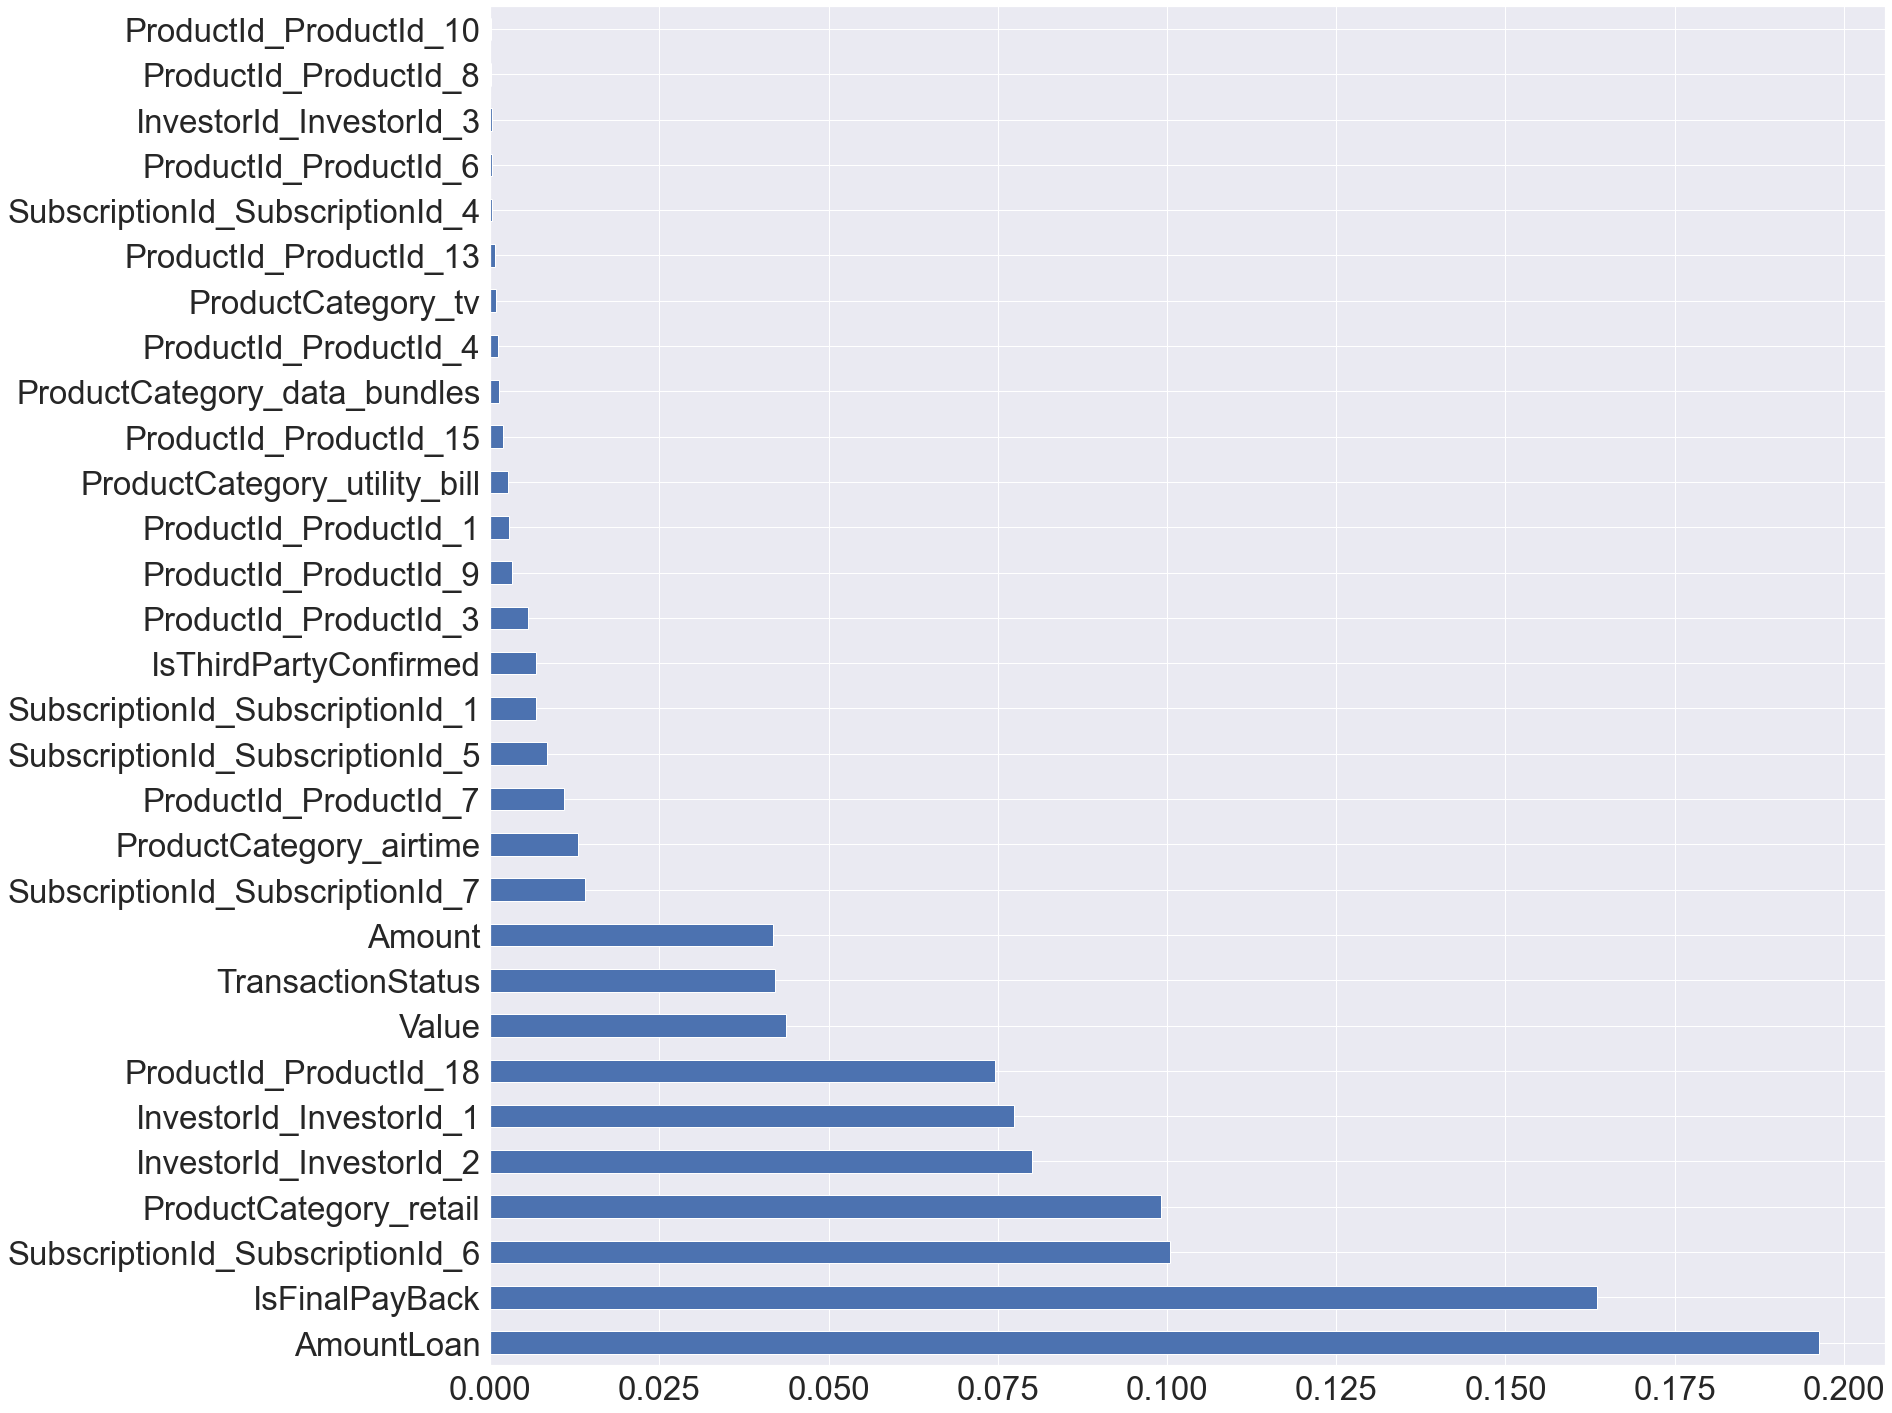

In [49]:
#create model for training 
model = ExtraTreesClassifier()
model.fit(features,target)

#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_) 

#plot graph of feature importances for better visualization
feature_importances = pd.Series(model.feature_importances_, index=features.columns)

# show the first 30 important features 

fig= plt.figure(figsize=(25,25))
sns.set(font_scale = 3)
feature_importances.nlargest(30).plot(kind='barh')
plt.show() 

### Correlation Matrix with Heatmap

<AxesSubplot:>

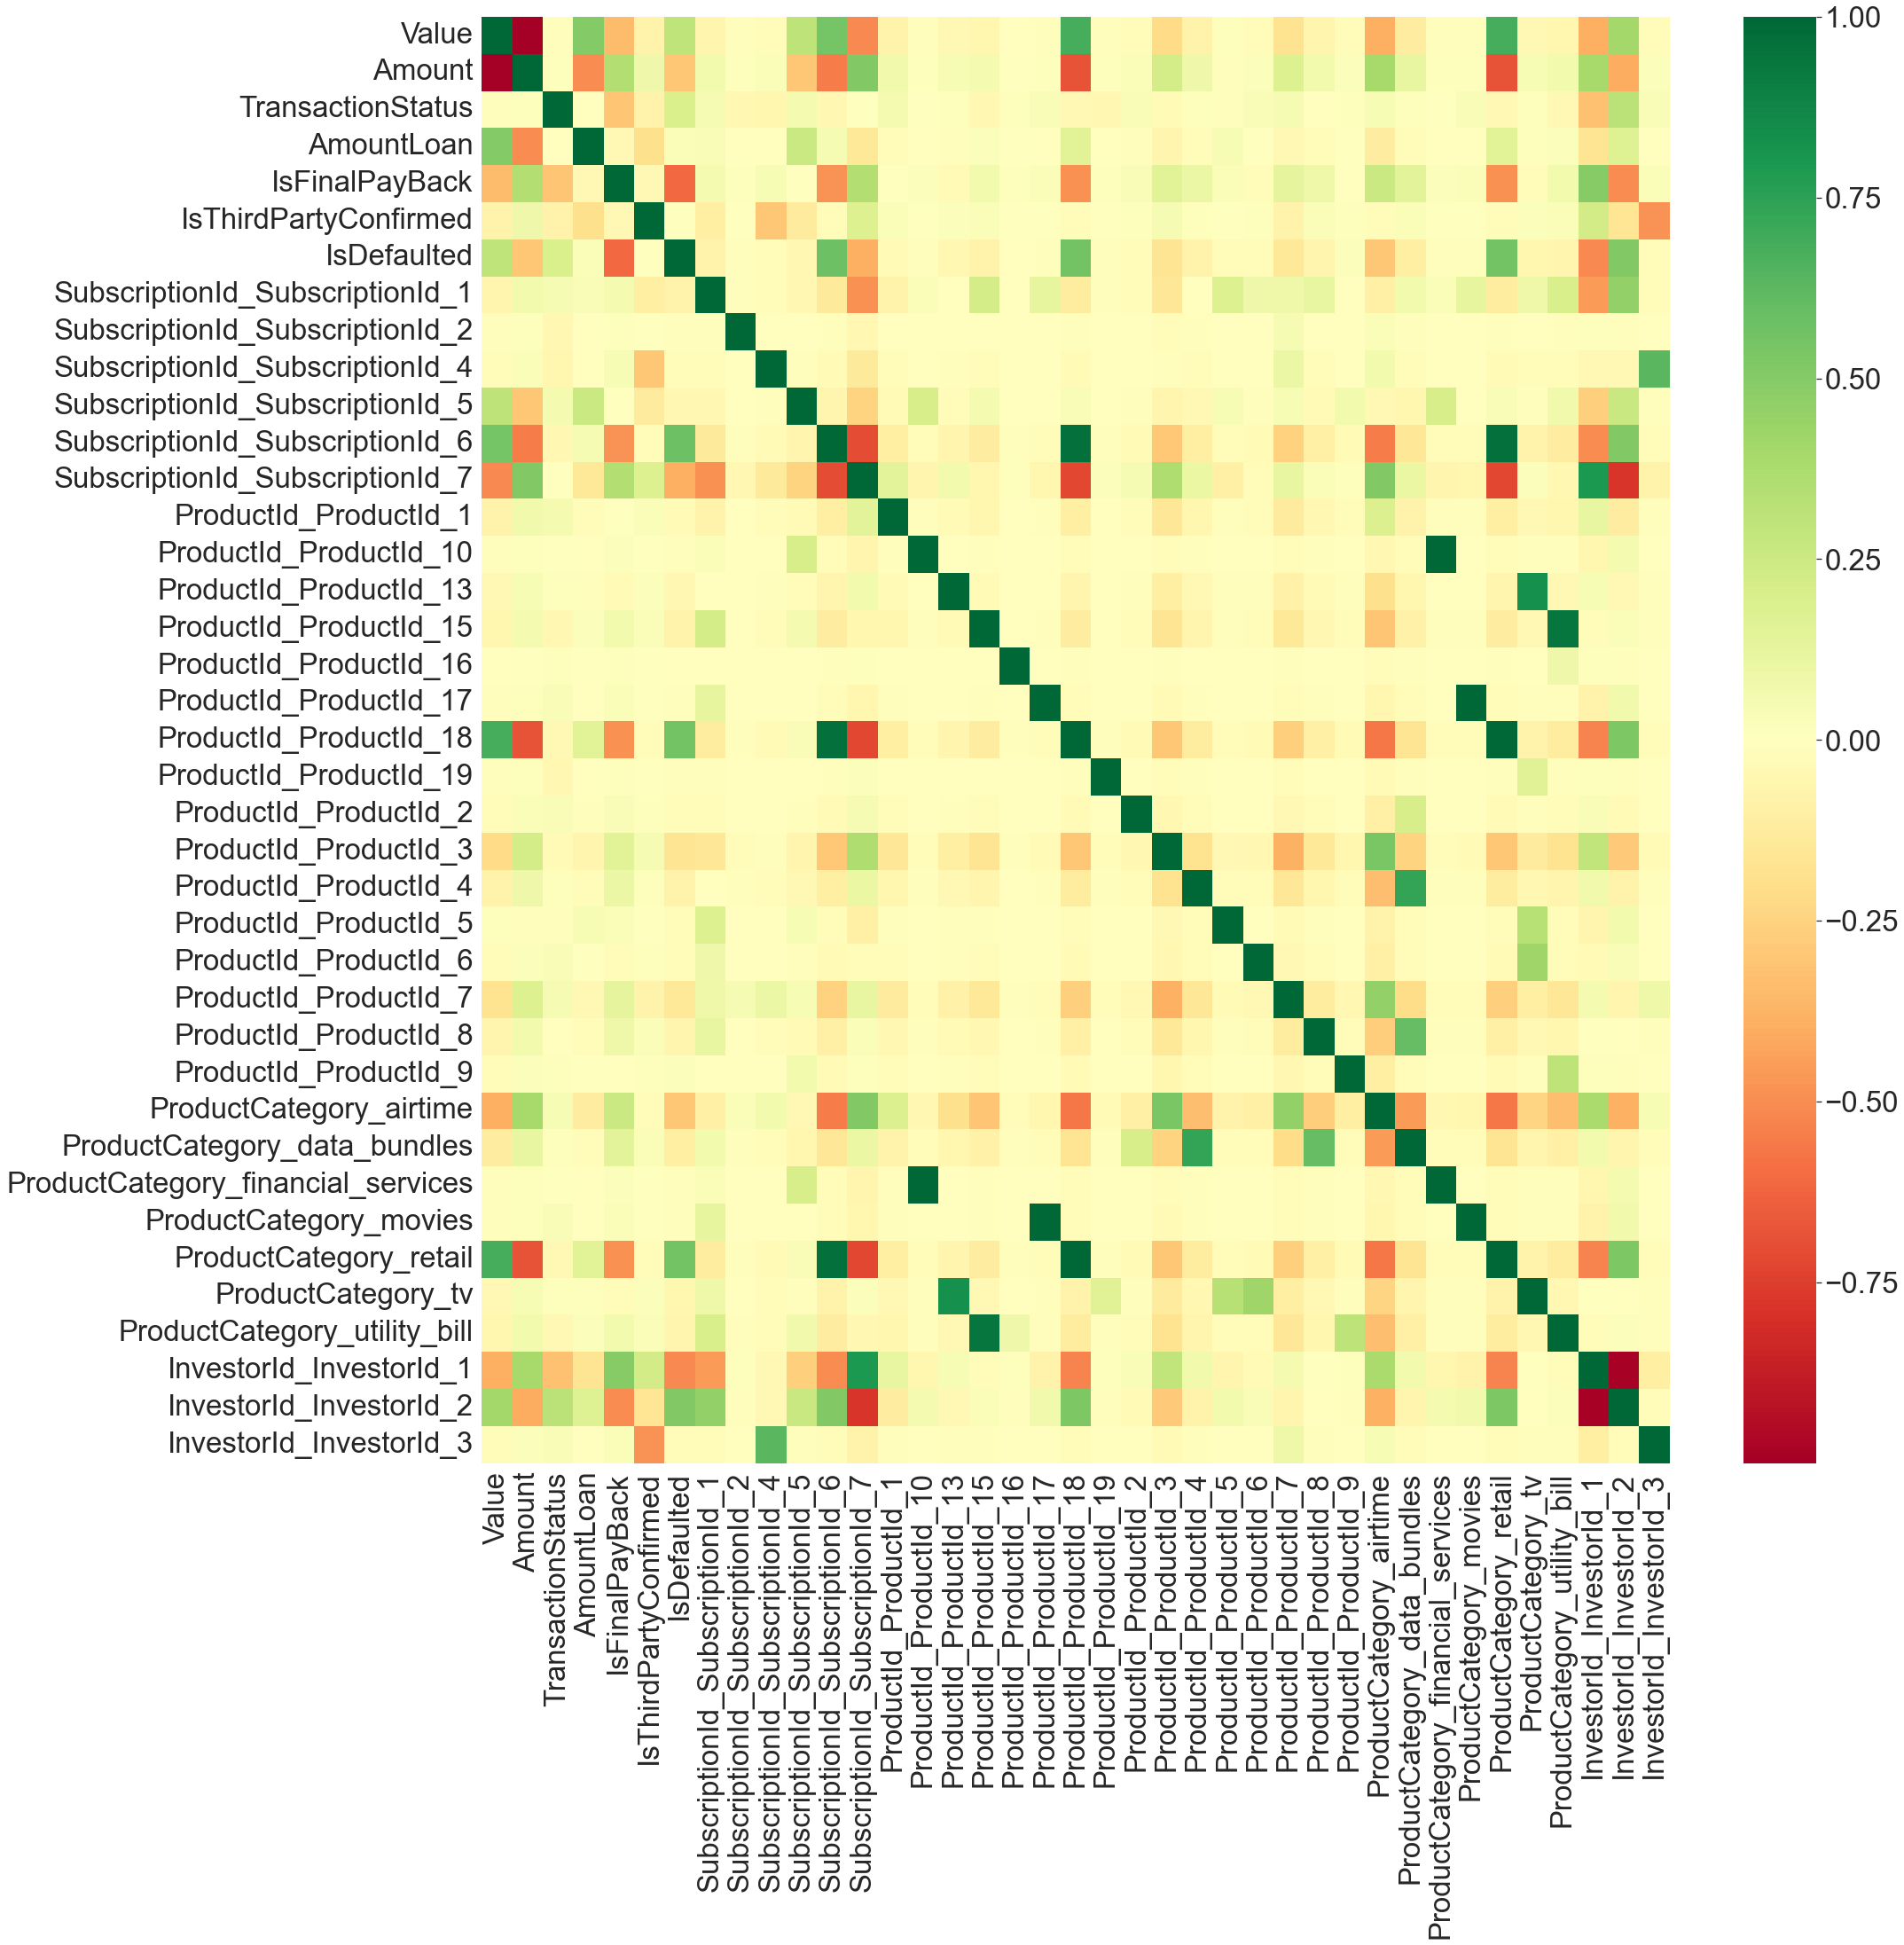

In [50]:
#get correlations of each features in dataset
plt.figure(figsize=(30,30))

#plot heat map
sns.set(font_scale = 3)
# to show number set annot=True
d = sns.heatmap(data.corr(),annot=False, cmap="RdYlGn")

#save the figure 
figure = d.get_figure()
figure.savefig("heatmap_output.png")

# show the heatamp graph 
d   

In [51]:
# SHOW CORRELATION OF DATA TO THE TARGET COLUMN 
features_corr = pd.DataFrame(abs(data.corr()['IsDefaulted']).sort_values(ascending = False)) 

features_corr 

,IsDefaulted
IsDefaulted,1.000000
IsFinalPayBack,0.615272
SubscriptionId_SubscriptionId_6,0.571025
ProductId_ProductId_18,0.557639
ProductCategory_retail,0.557639
InvestorId_InvestorId_2,0.515293
InvestorId_InvestorId_1,0.510338
SubscriptionId_SubscriptionId_7,0.397257
ProductCategory_airtime,0.303483
Amount,0.297059


# Machine Learning Model

### Random Forest Classifier

In [52]:
# splitting the dataset

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(features,target,stratify=target,test_size=0.25,random_state=42)

In [53]:
# importing RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier


In [54]:
# creating a RF Classifier

r_Classifier= RandomForestClassifier(n_estimators = 100)


# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters

r_Classifier.fit(x_train,y_train)

# performing prediction on the test dataset
y_predicts = r_Classifier.predict(x_test)


# metrics are used to find accuracy or error
from sklearn import metrics

#using metrics module for accuracy calculation
print("Accuracy of the model: ", metrics.roc_auc_score(y_test,y_predicts))

Accuracy of the model:  0.8149924399924401


In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predicts))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       481
         1.0       0.67      0.66      0.67        44

    accuracy                           0.94       525
   macro avg       0.82      0.81      0.82       525
weighted avg       0.94      0.94      0.94       525



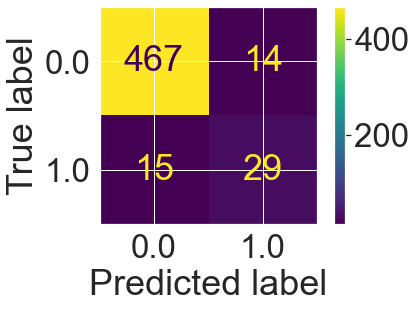

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(r_Classifier,x_test,y_test)
plt.show()

## Since, It is imbalanced we emplore

In [57]:
# import SMOTE to balance

from imblearn.over_sampling import SMOTE

In [58]:
# Creating a oversample 

oversample = SMOTE()

In [59]:
# fiting

re_features,re_target = oversample.fit_resample(features,target)

In [60]:
# Split the dataset

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(re_features,re_target,stratify=re_target,test_size=0.25,random_state=42)

# importing RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier


In [61]:
# creating a RF Classifier

r_Classifier= RandomForestClassifier(n_estimators = 100)


# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters

r_Classifier.fit(x_train,y_train)

# performing prediction on the test dataset
y_predicts = r_Classifier.predict(x_test)


# metrics are used to find accuracy or error
from sklearn import metrics

#using metrics module for accuracy calculation
print("Accuracy of the model: ", metrics.roc_auc_score(y_test,y_predicts))


Accuracy of the model:  0.9636001386001385


In [62]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predicts))

              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       481
         1.0       0.95      0.98      0.96       480

    accuracy                           0.96       961
   macro avg       0.96      0.96      0.96       961
weighted avg       0.96      0.96      0.96       961



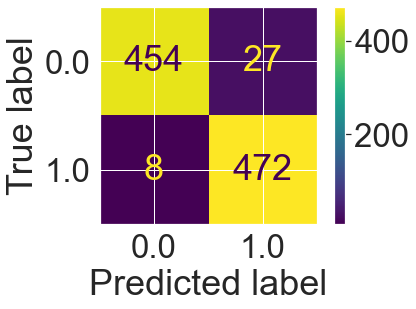

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(r_Classifier,x_test,y_test)
plt.show()

Accuracy is improved because the closer the AUC is to 1, the better the model.
It is balanced.
